In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import SpectralClustering
import numpy as np
import networkx as nx

In [2]:
df = pd.DataFrame({'m1':[1,0,0,0],'m2':[1,1,0,0],'m3':[1,0,1,1],'m4':[1,0,0,1],'m5':[1,0,0,0]})
# df = pd.DataFrame(np.random.randint(0,5,size=(10, 100)))

In [3]:
def models_clustering(df, method='spectral', nclusters=3 ):
    corr = df.corr()
    basic_corr = corr.style.background_gradient(cmap='coolwarm')
    
    similarity = corr+1
    clustering = SpectralClustering(n_clusters=nclusters, affinity='precomputed').fit(similarity)
    models_clusters = sorted((zip(clustering.labels_,range(df.shape[1]))), key= lambda x:x[0])
    _ , order = zip(*models_clusters)
    val_ord , _ = zip(*sorted((zip(df.columns,order)), key= lambda x:x[1]))
    ord_corr = df[list(val_ord)].corr()
    clusterd_corr = ord_corr.style.background_gradient(cmap='coolwarm')
    print([(z,df.columns[w]) for z,w in models_clusters])
    return basic_corr, clusterd_corr

In [4]:
x,y = models_clustering(df)

[(0, 'm1'), (0, 'm3'), (0, 'm5'), (1, 'm4'), (2, 'm2')]


In [5]:
x

,m1,m2,m3,m4,m5
m1,1,0.57735,0.333333,0.57735,1
m2,0.57735,1,-0.57735,0,0.57735
m3,0.333333,-0.57735,1,0.57735,0.333333
m4,0.57735,0,0.57735,1,0.57735
m5,1,0.57735,0.333333,0.57735,1


In [6]:
y

,m1,m5,m2,m4,m3
m1,1,1,0.57735,0.57735,0.333333
m5,1,1,0.57735,0.57735,0.333333
m2,0.57735,0.57735,1,0,-0.57735
m4,0.57735,0.57735,0,1,0.57735
m3,0.333333,0.333333,-0.57735,0.57735,1


In [7]:
def models_graph(df, strong_th=0.7, weak_th=0.3, figsize=(15, 12)):
    corr = df.corr()
    G=nx.from_numpy_matrix(corr.values)
    
    nodes_names = dict(zip(range(corr.shape[0]),corr.columns))
    H = nx.relabel_nodes(G, nodes_names)
    
    elarge = [(u, v) for (u, v, d) in H.edges(data=True) if np.abs(d['weight']) > strong_th]
    esmall = [(u, v) for (u, v, d) in H.edges(data=True) if ((np.abs(d['weight']) <= strong_th) and (np.abs(d['weight']) > weak_th))]
    
    pos = nx.circular_layout(H)  # positions for all nodes
    
    fig=plt.figure(figsize=figsize, dpi= 80, facecolor='w', edgecolor='k')
    
    # nodes
    nx.draw_networkx_nodes(H, pos, node_size=700)
    
    # edges
    nx.draw_networkx_edges(H, pos, edgelist=elarge, width=6)
    nx.draw_networkx_edges(H, pos, edgelist=esmall, width=6, alpha=0.5, edge_color='b', style='dashed')

    # labels
    nx.draw_networkx_labels(H, pos, font_size=20, font_family='sans-serif')
    
    
    
    plt.axis('off')
    plt.show()

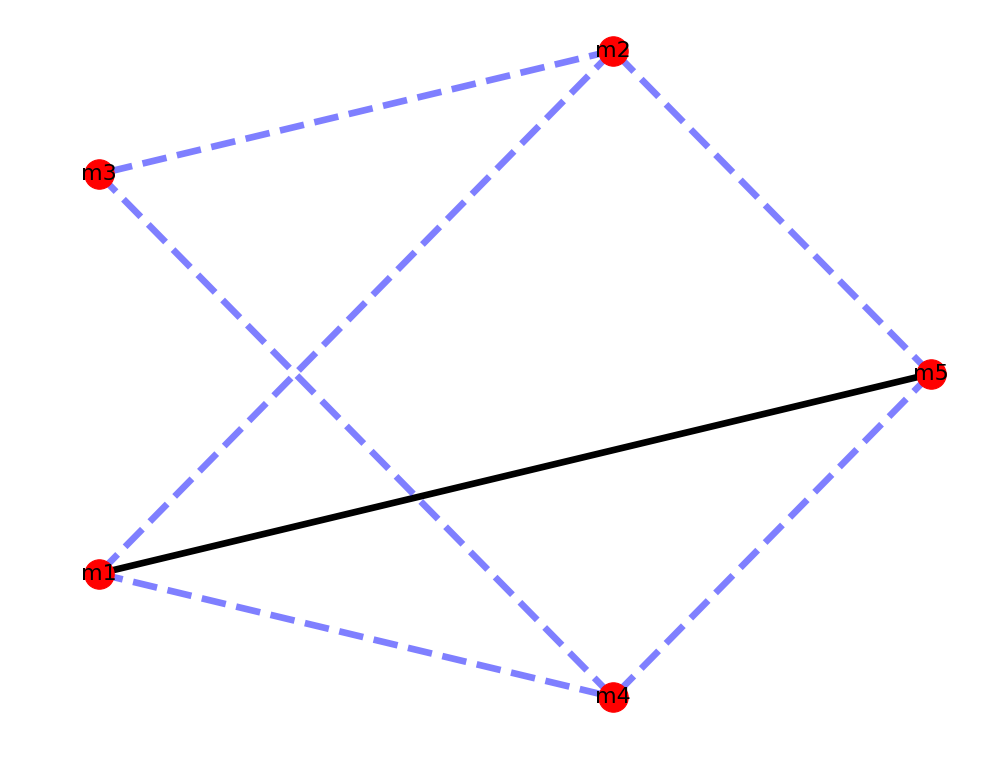

In [8]:
models_graph(df, strong_th=0.8, weak_th=0.5)